# Анализ рынка автомобилей в Республике Казахстан

### Описание проекта 

Имеется датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из
официальной статистики VAG, после перевода из эксель в csv обнаружились множественные
проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие
данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты - например, 4WD, 4 WD и 4-WD, а также одни и те же
признаки могут быть записаны как на русском, так и на английском языке. Также необходимо
очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не
нужны в управленческом учете.

### План задачи

1) Подключить библиотеки, и обработать данные

2) Подготовить и предобработать данные

2.1) Выявить и исправить неявные дубликаты

2.2) Провести анализ качества данных в колонках

2.3) Проверить на пропуски значений и обработать в случае их нахождения

2.4) Восстановить некорректные данные

2.5) Создать колонки для дальнейшей работы

3) Провести анализ рынка

3.1) Найти топовые марки машин в денежном выражении

3.2) Найти топовые марки машин в количественном выражении

3.3) Создать общую таблицу суммы продажи и количества автомобилей

3.4) Исследовать динамику продаж в целом по рынку: в денежном и натуральном выражении

3.5) Исследовать динамику продаж по категориям (помесячно): тип топлива, класс, сегмент

3.6) Исследовать продажи по регионам

3.7) Исследовать продажи по автоцентрам

3.8) Выявить самые популярные модели у брендов

4) Подвести итог и дать рекомендацию для 

## Подключение библиотек и загрузка данных

In [301]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [302]:
data = pd.read_csv('/Users/Риндикт/notebook/Пет проект автопром казахстан/auto_kz_2019.csv', sep = ';')

In [303]:
data.head(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [304]:
pd.set_option('display.max_columns', None)

## Предобработка данных

In [305]:
def info(data):
    ''' 
    Функция для предварительной обработки датасетов
    '''
    
    print("Дубликатов обнаружено: ", data.duplicated().sum()) 
    print()
    print('Пропусков обнаружено:', data.isna().sum())
    print()
    data.info()
    return data

In [306]:
data = info(data)

Дубликатов обнаружено:  18698

Пропусков обнаружено: Год                                   0
Месяц                                 0
Компания                              0
Бренд                                 0
Модель                                0
Модификация                        3591
Год выпуска                         501
Страна-производитель                  0
Вид топлива                        3140
Объём двиг, л,                     4258
Коробка передач                    3255
Тип привода                        4289
Сегмент                            6761
Регион                                0
Наименование дилерского центра        0
Тип клиента                        7047
Форма расчета                     25928
Количество                            6
Цена, USD                             0
Продажа, USD                          0
Область                               0
Сегментация 2013                      0
Класс 2013                            0
Сегментация Eng            

### Удаление лишних столбцов

In [307]:
data = data.drop(['Наименование дилерского центра','Сегмент','Сегментация Eng','Модификация','Форма расчета','Локализация производства','Тип клиента'],axis=1)

### Изменение названия столбцов

In [308]:
data = data.rename(columns = {'Год':'Year','Месяц':'Month',\
                       'Компания':'Company','Бренд':'Brand','Модель':'Model',\
                       'Год выпуска':'Year_of_issue',\
                       'Страна-производитель':'Manufacturer_country','Вид топлива':'Type_of_fuel','Объём двиг, л,':'Engine_volume',\
                       'Коробка передач':'Transmission','Тип привода':'Type_of_drive','Регион':'Region',\
                       'Наименование дилерского центра':'Dealership_name',\
                       'Количество':'Quantity','Цена, USD':'Price_USD','Продажа, USD':'Sale_USD',\
                       'Область':'Area','Сегментация 2013':'Segmentation_2013','Класс 2013':'Class_2013'})

In [309]:
data.duplicated().sum()

23471

### Исправляю неявные дубликаты в коллонках 'Brand' и 'Company'

In [310]:
data['Brand'] = data['Brand'].str.replace('Mercedes-Benz Trucks','Mercedes-Benz')
data['Brand'] = data['Brand'].str.replace('Hyundai Truck & Bus','Hyundai')
data['Company'] = data['Company'].str.replace('Astana Motors ','Astana Motors')
data['Company'] = data['Company'].str.replace('Ravon Motors Kazakstan','Равон Моторс Казахстан')
data['Company'] = data['Company'].str.replace('Caspian Motors','Каспиан Моторс')

### Исправление столбца "Дата выпуска"

In [311]:
data.Year_of_issue.value_counts()

2019     29185
2018      8679
2 019      841
2 018      402
2017       324
2016        30
2014         2
2013         1
2011         1
Name: Year_of_issue, dtype: int64

In [312]:
year = '2019','2018','nan','2017','2016','2014','2013','2011'
data.Year_of_issue = data.Year_of_issue.astype(str)
data.Year_of_issue = data.Year_of_issue.apply(lambda x: x.replace('2\xa0019','2019'))
data.Year_of_issue = data.Year_of_issue.apply(lambda x: x.replace('2\xa0018','2018'))
data = data.query('Year_of_issue!="nan"')
data.Year_of_issue = data.Year_of_issue.astype(int)

### Кодирую тип топлива

In [313]:
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('бензин','Бензин')
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('Бензин ','Бензин')
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('Электричество','Электро')
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('дизель','Дизель')
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('Дизель ','Дизель')
data['Type_of_fuel'] = data['Type_of_fuel'].str.replace('гибрид','Гибрид')
data.loc[data['Type_of_fuel']=='2','Type_of_fuel'] = np.nan
data.loc[data['Type_of_fuel']=='1,6','Type_of_fuel'] = np.nan
data.loc[data['Type_of_fuel']=='0','Type_of_fuel'] = np.nan
data['Type_of_fuel'] = data['Type_of_fuel'].astype(str)

In [314]:
data.Type_of_fuel.value_counts()

Бензин     34903
nan         2761
Дизель      1778
Электро       13
Гибрид        10
Name: Type_of_fuel, dtype: int64

### Разбираюсь с колонкой Объём двиг,л,

In [315]:
data.Engine_volume = data.Engine_volume.astype(str)
data.Engine_volume = data.Engine_volume.apply(lambda x: x.replace(',','.'))

data.Engine_volume = data.Engine_volume.str.replace('2.4 GDI','2.4')
data.Engine_volume = data.Engine_volume.str.replace('2.4 MPI','2.4')
data.Engine_volume = data.Engine_volume.str.replace('1.6 MPI','1.6')
data.Engine_volume = data.Engine_volume.str.replace('2.0 MPI','2')
data.Engine_volume = data.Engine_volume.str.replace('1.774','1.8')
data.Engine_volume = data.Engine_volume.str.replace('2.693','2.7')
data.Engine_volume = data.Engine_volume.str.replace('1.69','1.7')
data.Engine_volume = data.Engine_volume.str.replace('4.0','4')
data.Engine_volume = data.Engine_volume.str.replace('1.598','1.6')
data.Engine_volume = data.Engine_volume.str.replace('1.999','2')
data.Engine_volume = data.Engine_volume.str.replace('2.359','2.4')
data.Engine_volume = data.Engine_volume.str.replace('1.596','1.6')
data.Engine_volume = data.Engine_volume.str.replace('1.2T','1.2')
data.Engine_volume = data.Engine_volume.str.replace('2.4G','2.4')
data.Engine_volume = data.Engine_volume.str.replace('1.248','1.2')
data.Engine_volume = data.Engine_volume.str.replace('1.998','2')
data.Engine_volume = data.Engine_volume.str.replace('1.591','1.6') 
data.Engine_volume = data.Engine_volume.str.replace('1.485','1.5') 
data.Engine_volume = data.Engine_volume.str.replace('1.6 T-GDI','1.6') 
data.Engine_volume = data.Engine_volume.str.replace('3.342','3.3') 
data.Engine_volume = data.Engine_volume.str.replace('2.0h','2') 
data.Engine_volume = data.Engine_volume.str.replace('2.5 CRDI WGT','2.5') 
data.Engine_volume = data.Engine_volume.str.replace('2.5 CRDI VGT','2.5') 
data.Engine_volume = data.Engine_volume.str.replace('1.4 Turbo','1.4') 
data.Engine_volume = data.Engine_volume.str.replace('2.0 CRDI Turbo','2') 
data.Engine_volume = data.Engine_volume.str.replace('1.4 Turbo','1.4') 
data.Engine_volume = data.Engine_volume.str.replace('4.98','5')
data.Engine_volume = data.Engine_volume.str.replace('2.0','2')
data.Engine_volume = data.Engine_volume.str.replace('4.0','4')
data.Engine_volume = data.Engine_volume.str.replace('2.0','2')
data.Engine_volume = data.Engine_volume.str.replace('MT','0')
data.Engine_volume = data.Engine_volume.str.replace('3.47','3.5')
data.Engine_volume = data.Engine_volume.str.replace('AT','0')
data.Engine_volume = data.Engine_volume.str.replace('#Н/Д','0')
data.Engine_volume = data.Engine_volume.str.replace('400 Л.С.','0')
data.Engine_volume = data.Engine_volume.str.replace('2.0 CRDI','2')
data.Engine_volume = data.Engine_volume.str.replace('5.','5')
data.Engine_volume = data.Engine_volume.str.replace('2 CRDI','2')
data.Engine_volume = data.Engine_volume.str.replace('1.33','1.3')
data.Engine_volume = data.Engine_volume.str.replace('8.4 L','8.4')
data.Engine_volume = data.Engine_volume.str.replace('6.7L','6.7')
data.Engine_volume = data.Engine_volume.str.replace('88 KWH','0')
data.Engine_volume = data.Engine_volume.str.replace('26.7','0')
data.Engine_volume = data.Engine_volume.str.replace('3.0 L','3')
data.Engine_volume = data.Engine_volume.str.replace('5 L.','5')
data.Engine_volume = data.Engine_volume.str.replace('5L.','5')
data.Engine_volume = data.Engine_volume.str.replace('56','0')
data.Engine_volume = data.Engine_volume.str.replace('57','0')
data.Engine_volume = data.Engine_volume.str.replace('13','0')
data.Engine_volume = data.Engine_volume.str.replace('52','0')
data.Engine_volume = data.Engine_volume.str.replace('55','0')
data.Engine_volume = data.Engine_volume.str.replace('257','0')
data.Engine_volume = data.Engine_volume.str.replace('8.4. ','8.4')
data.Engine_volume = data.Engine_volume.str.replace('4.3.','4.3')
data.Engine_volume = data.Engine_volume.str.replace('1.4 Turbo','1.4')
data.Engine_volume = data.Engine_volume.str.replace('4 Л.С.','0')
data.Engine_volume = data.Engine_volume.str.replace('8.4.','8.4')
data.Engine_volume = data.Engine_volume.apply(lambda x: x.replace(',','.'))

data.loc[data['Engine_volume']=='0','Engine_volume'] = np.nan
data.loc[data['Engine_volume']=='nan','Engine_volume'] = np.nan


data.Engine_volume = data.Engine_volume.astype(float)
data.Engine_volume.fillna(0)
data.loc[data['Engine_volume']>16.2,'Engine_volume'] = 0

Отсекаю значения больше 16 потому что двигатель 16.1 л встречается только в самых больших грузовиках, передвигающихся по автомобильным дорогам,привёл некорректные значения к nan

### Обрабатываю с колонку Трансмиссии

In [316]:
data['Transmission'] = data['Transmission'].str.replace('6 AT','АКП')
data['Transmission'] = data['Transmission'].str.replace('Мех.','МКП')
data['Transmission'] = data['Transmission'].str.replace('5 МТ','МКП')
data['Transmission'] = data['Transmission'].str.replace('6 АТ','АКП')
data['Transmission'] = data['Transmission'].str.replace('8 АТ','АКП')
data['Transmission'] = data['Transmission'].str.replace('6 MT','МКП')
data['Transmission'] = data['Transmission'].str.replace('6A','АКП')
data['Transmission'] = data['Transmission'].str.replace('АT','АКП')
data['Transmission'] = data['Transmission'].str.replace('4 АТ','АКП')
data['Transmission'] = data['Transmission'].str.replace('6 МТ','МКП')
data.loc[data['Transmission']=='CVT (вариатор)','Transmission'] ='АКП'
data.loc[data['Transmission']=='CVT(вAриATор)','Transmission'] ='АКП'
data.loc[data['Transmission']=='CVT (вариATор)','Transmission'] ='АКП'
data.loc[data['Transmission']=='S-tronic','Transmission'] ='АКП'
data.loc[data['Transmission']=='4AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='5MT','Transmission'] ='МКП'
data.loc[data['Transmission']=='6МТ','Transmission'] ='МКП'
data.loc[data['Transmission']=='6M/T','Transmission'] ='МКП'
data.loc[data['Transmission']=='A/T','Transmission'] ='АКП'
data.loc[data['Transmission']=='АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='МТ','Transmission'] ='МКП'
data.loc[data['Transmission']=='5 AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='12AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='5AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='6 DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='7 АКПП (PDK)','Transmission'] ='АКП'
data.loc[data['Transmission']=='7 DCT','Transmission'] ='МКП'
data.loc[data['Transmission']=='7 DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='8 AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='М/T','Transmission'] ='МКП'
data.loc[data['Transmission']=='А/T','Transmission'] ='АКП'
data.loc[data['Transmission']=='8АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='8-ступ АКПП','Transmission'] ='АКП'
data.loc[data['Transmission']=='МT','Transmission'] ='МКП'
data.loc[data['Transmission']=='M/T','Transmission'] ='МКП'
data.loc[data['Transmission']==' 7 АКП','Transmission'] ='АКП'
data.loc[data['Transmission']=='7АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='5М','Transmission'] ='МКП'
data.loc[data['Transmission']=='MT','Transmission'] ='МКП'
data.loc[data['Transmission']=='7DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='6MT','Transmission'] ='МКП'
data.loc[data['Transmission']=='6DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='МКПП','Transmission'] ='МКП'
data.loc[data['Transmission']=='DSG','Transmission'] ='МКП'
data.loc[data['Transmission']=='DCT','Transmission'] ='МКП'
data.loc[data['Transmission']=='7DCT','Transmission'] ='МКП'
data.loc[data['Transmission']=='7АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='CVT','Transmission'] ='АКП'
data.loc[data['Transmission']=='6АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='АКПП','Transmission'] ='АКП'
data.loc[data['Transmission']=='4АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='8AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='9G-TRONIC','Transmission'] ='АКП'
data.loc[data['Transmission']=='7G-TRONIC','Transmission'] ='АКП'
data.loc[data['Transmission']=='6А','Transmission'] ='АКП'
data.loc[data['Transmission']=='S-Tronic','Transmission'] ='АКП'
data.loc[data['Transmission']=='8 АКПП Tiptronic S','Transmission'] ='АКП'
data.loc[data['Transmission']=='7АКП','Transmission'] ='АКП'
data.loc[data['Transmission']=='9AT','Transmission'] ='АКП'
data.loc[data['Transmission']=='8 АКПП (PDK)','Transmission'] ='АКП'
data.loc[data['Transmission']=='PDK','Transmission'] ='АКП'
data.loc[data['Transmission']=='7 АКПП PDK','Transmission'] ='АКП'
data.loc[data['Transmission']=='АКПT','Transmission'] ='АКП'
data.loc[data['Transmission']=='AMT','Transmission'] ='АКП'
data.loc[data['Transmission']=='Tiptronic','Transmission'] ='АКП'
data.loc[data['Transmission']=='5АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='8АКПП','Transmission'] ='АКП'
data.loc[data['Transmission']=='8A','Transmission'] ='АКП'
data.loc[data['Transmission']=='12АТ','Transmission'] ='АКП'
data.loc[data['Transmission']=='Steptronic','Transmission'] ='АКП'
data.loc[data['Transmission']=='5МТ','Transmission'] ='МКП'
data.loc[data['Transmission']=='5M','Transmission'] ='МКП'
data.loc[data['Transmission']=='Powershift S6','Transmission'] ='МКП'
data.loc[data['Transmission']=='7AT','Transmission'] ='АКП'

data.loc[data['Transmission']=='4WD','Transmission'] = np.nan
data.loc[data['Transmission']=='Передний','Transmission'] = np.nan
data.loc[data['Transmission']=='#Н/Д','Transmission'] = np.nan
data.loc[data['Transmission']=='РЕДУКТОР','Transmission'] = np.nan
data.loc[data['Transmission']=='0','Transmission'] = np.nan
data.loc[data['Transmission']=='TDI','Transmission'] = np.nan
data.loc[data['Transmission']=='8','Transmission'] = np.nan

In [317]:
data.Transmission.value_counts()

АКП    27817
МКП     8558
Name: Transmission, dtype: int64

Упростил значения до 2-х вариантов АКП и МКП, некорректные значения привел к nan

### Исправляю неявные дубликаты в колонке Тип привода

In [318]:

data.loc[data['Type_of_drive']=='2 WD','Type_of_drive'] ='2WD'
data.loc[data['Type_of_drive']=='4X2','Type_of_drive'] ='2WD'
data.loc[data['Type_of_drive']=='4x2','Type_of_drive'] ='2WD'
data.loc[data['Type_of_drive']=='4х2','Type_of_drive'] ='2WD'
data.loc[data['Type_of_drive']=='4х2.2','Type_of_drive'] ='2WD'

data.loc[data['Type_of_drive']=='4 WD','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='4X4','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='4х4','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='quattro','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='4Motion','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='полный','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='4x4','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='AWD','Type_of_drive'] ='4WD'
data.loc[data['Type_of_drive']=='Полный','Type_of_drive'] ='4WD'

data.loc[data['Type_of_drive']=='FF','Type_of_drive'] ='FWD'
data.loc[data['Type_of_drive']=='передний','Type_of_drive'] ='FWD'
data.loc[data['Type_of_drive']=='Передний (FF)','Type_of_drive'] ='FWD'
data.loc[data['Type_of_drive']=='FWD','Type_of_drive'] ='FWD'
data.loc[data['Type_of_drive']=='Передний','Type_of_drive'] ='FWD'


data.loc[data['Type_of_drive']=='RWD','Type_of_drive'] ='RWD'
data.loc[data['Type_of_drive']=='Задний','Type_of_drive'] ='RWD'


data.loc[data['Type_of_drive']=='0','Type_of_drive'] = np.nan
data.loc[data['Type_of_drive']=='#Н/Д','Type_of_drive'] = np.nan
data.loc[data['Type_of_drive']=='Астана','Type_of_drive'] = np.nan

In [319]:
data.Type_of_drive.value_counts()

4WD    14983
2WD     9791
FWD     9035
RWD     1674
Name: Type_of_drive, dtype: int64

### Обрабатываю некорректные значения колонки регион

In [320]:
data.loc[data['Region']=='0','Region'] = np.nan 
data.loc[data['Region']=='Шасси','Region'] = np.nan
data.loc[data['Region']=='12АТ','Region']= np.nan
data.loc[data['Region']=='2WD','Region'] = np.nan
data.loc[data['Region']=='4WD','Region'] = np.nan
data.loc[data['Region']=='4АТ','Region'] = np.nan
data.loc[data['Region']=='5M','Region'] = np.nan
data.loc[data['Region']=='6DSG','Region'] = np.nan
data.loc[data['Region']=='6MT','Region'] = np.nan
data.loc[data['Region']=='7 АКПП PDK','Region'] = np.nan
data.loc[data['Region']=='7AT','Region'] = np.nan
data.loc[data['Region']=='7DCT','Region'] = np.nan
data.loc[data['Region']=='7DSG','Region'] = np.nan
data.loc[data['Region']=='7АКП','Region'] = np.nan
data.loc[data['Region']=='8AT','Region'] = np.nan
data.loc[data['Region']=='8АКПП','Region'] = np.nan
data.loc[data['Region']=='AT','Region'] = np.nan
data.loc[data['Region']=='B класс','Region'] = np.nan
data.loc[data['Region']=='C класс','Region'] = np.nan
data.loc[data['Region']=='5АТ','Region'] = np.nan
data.loc[data['Region']=='5МТ','Region'] = np.nan
data.loc[data['Region']=='CVT','Region'] = np.nan
data.loc[data['Region']=='D класс','Region'] = np.nan
data.loc[data['Region']=='MT','Region'] = np.nan
data.loc[data['Region']=='S-Tronic','Region'] = np.nan
data.loc[(data['Area']=='г.Алматы'),'Area'] = 'Алматинская область'
data.Region = data.Region.apply(lambda x: x.capitalize()) 
data.Region.value_counts()

Алматы              11055
Нур-султан           8187
Шымкент              2872
Костанай             2423
Атырау               2150
Караганда            2035
Экспорт              1589
Актау                1495
Уральск              1483
Актобе               1351
Павлодар             1211
Усть-каменогорск     1159
Кызылорда             554
Петропавловск         508
Кокшетау              471
Семей                 290
Талдыкорган           230
Тараз                 205
Экибастуз              88
Рудный                 47
Каскелен               38
Туркестан              15
Сарыагаш                4
Кульсары                2
Риддер                  2
Зыряновск               1
Name: Region, dtype: int64

### Обрабатываю некорректные значения колонок количество, цена и продажа

In [321]:
data.loc[data['Quantity']=='Безналичный','Quantity'] = np.nan 
data.loc[data['Quantity']=='Наличный','Quantity'] = np.nan 
data.loc[data['Quantity']=='Trade in','Quantity'] = np.nan 
data.loc[data['Quantity']=='Nissan Center Уральск','Quantity'] = np.nan 
data.loc[data['Quantity']=='Auto Trader','Quantity'] = np.nan 
data.loc[data['Quantity']=='Auto Trader ','Quantity'] = np.nan 
data.Quantity = data.Quantity.fillna(0)
data.Quantity = data.Quantity.astype(int)
data.Price_USD = data.Price_USD.apply(lambda x: x.replace(',','.'))
data.Price_USD = round(data.Price_USD.astype(float),1)
data.Sale_USD = data.Sale_USD.apply(lambda x: x.replace(',','.'))
data.Sale_USD = round(data.Sale_USD.astype(float),1)

### Ищу данные с пропусками в столбцах которые сложно восстановить

In [322]:
corrupted_data = data.loc[(data['Type_of_fuel']== 'nan') & (data['Engine_volume'].isna() == True) & (data['Transmission'].isna() == True)& (data['Type_of_drive'].isna() == True)]
corrupted_data.Company.count()/data.Company.count()

0.05746864310148233

Потеря файлов из ~6% не критично скажется на результате исследования

In [323]:
corrupted_data = corrupted_data.index 
data = data.reset_index()
data = data.query('index not in @corrupted_data')
data.drop('index',axis = 1)
data.isna().sum()

index                      0
Year                       0
Month                      0
Company                    0
Brand                      0
Model                      0
Year_of_issue              0
Manufacturer_country       0
Type_of_fuel               0
Engine_volume           2214
Transmission             822
Type_of_drive           1714
Region                     0
Quantity                   0
Price_USD                  0
Sale_USD                   0
Area                       0
Segmentation_2013          0
Class_2013                 0
dtype: int64

Удалив эти данные остаётся всё еще много пропусков, но их восстановить проще

### Восстанавливаю данные из разных источников интернета

In [324]:
data.Engine_volume = data.Engine_volume.fillna(0)
data.Type_of_drive = data.Type_of_drive.fillna(0)
data.Transmission = data.Transmission.fillna(0)

data.loc[(data['Brand']=='Chevrolet') & (data['Model']=='Niva') & (data['Type_of_drive']=='4WD')& (data['Engine_volume']== 0.0),'Engine_volume'] =1.7

data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2310'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2310'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2705'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2705'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2752'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='2752'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3221'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3221'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3302'),'Engine_volume'] = 2.9
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3302'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3308'),'Engine_volume'] = 4.4
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='3308'),'Type_of_fuel'] = 'Дизель'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019')& (data['Model']=='Next'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='Next'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='2705'),'Engine_volume'] = 2.9
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='2705'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='3221'),'Engine_volume'] = 2.9
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='3221'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='3302'),'Engine_volume'] = 2.9
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='3302'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='Next'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='GAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='Next'),'Type_of_fuel'] = 'Бензин'

data.loc[(data['Brand']=='Infiniti') & (data['Year_of_issue']=='2018') & (data['Model']=='QX80'),'Engine_volume'] = 5.6
data.loc[(data['Brand']=='Infiniti') & (data['Year_of_issue']=='2019') & (data['Model']=='QX80'),'Engine_volume'] = 5.6

data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='D-MAX'),'Engine_volume'] = 2.5
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='D-MAX'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='D-MAX'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='D-MAX'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NMR'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NMR'),'Transmission'] = 'МКП'  
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NMR'),'Type_of_drive'] = '2WD'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NPR'),'Engine_volume'] = 5
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NPR'),'Transmission'] = 'АКП' 
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NPR'),'Engine_volume'] = 5.2
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NPR'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Model']=='NQR'),'Engine_volume'] = 5.2
data.loc[(data['Brand']=='Isuzu') & (data['Model']=='NQR'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NMS85'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NMS85'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NPS'),'Engine_volume'] = 5.2
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2018') & (data['Model']=='NPS'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NPS'),'Engine_volume'] = 5.2
data.loc[(data['Brand']=='Isuzu') & (data['Year_of_issue']=='2019') & (data['Model']=='NPS'),'Transmission'] = 'МКП'

data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2018') & (data['Model']=='Daily'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2018') & (data['Model']=='Daily'),'Type_of_fuel'] = 'Дизель'
data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2017') & (data['Model']=='Daily'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2017') & (data['Model']=='Daily'),'Type_of_fuel'] = 'Дизель'
data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2019') & (data['Model']=='Stralis'),'Engine_volume'] = 13
data.loc[(data['Brand']=='Iveco') & (data['Year_of_issue']=='2019') & (data['Model']=='Stralis'),'Type_of_fuel'] = 'Дизель'

data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='S3'),'Engine_volume'] = 1.6
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='S3'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='S3'),'Engine_volume'] = 1.5
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='S3'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='S5'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='S5'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='S5'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='S5'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='S5'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='S5'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2017') & (data['Model']=='S5'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2017') & (data['Model']=='S5'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2017') & (data['Model']=='S5'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2016') & (data['Model']=='S5'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2016') & (data['Model']=='S5'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2016') & (data['Model']=='S5'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Jac') & (data['Model']=='N120'),'Engine_volume'] = 3.8
data.loc[(data['Brand']=='Jac') & (data['Model']=='N120'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Model']=='N120'),'Type_of_fuel'] = 'Дизель'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2016') & (data['Model']=='X200'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Model']=='N75'),'Engine_volume'] = 3.8
data.loc[(data['Brand']=='Jac') & (data['Model']=='N75'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Model']=='N75'),'Type_of_fuel'] = 'Дизель'
data.loc[(data['Brand']=='Jac') & (data['Model']=='T6'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Jac') & (data['Model']=='T6'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Model']=='T6'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Jac') & (data['Model']=='iev'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Jac') & (data['Model']=='iev'),'Type_of_fuel'] = 'Электро'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2018') & (data['Model']=='iev'),'Type_of_drive'] = 'FWD'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='N56'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='N56'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Jac') & (data['Year_of_issue']=='2019') & (data['Model']=='N56'),'Type_of_drive'] = 'RWD'

data.loc[(data['Brand']=='KAMAZ') & (data['Model']=='58815Z'),'Engine_volume'] = 10.9
data.loc[(data['Brand']=='KAMAZ') & (data['Model']=='58815Z'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='4308'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='4311'),'Engine_volume'] = 10
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='43118'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='43118'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='43253'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='43253'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='43502'),'Engine_volume'] = 11.6
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='43502'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='43502'),'Engine_volume'] = 11.6
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='43502'),'Type_of_drive'] = '4WD' 
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='44108'),'Engine_volume'] = 11.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='44108'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45142'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45142'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='45142'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='45142'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='45143'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='45143'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45143'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45143'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='53215'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='53215'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53215'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53215'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53504'),'Engine_volume'] = 11.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53504'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53605'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='53605'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='54115'),'Engine_volume'] = 10.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='54115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='54115'),'Engine_volume'] = 10.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='54115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='5490'),'Engine_volume'] = 11.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='5490'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='5490'),'Engine_volume'] = 11.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='5490'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='5490'),'Engine_volume'] = 11.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='5490'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65111'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65111'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65111'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65111'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65115'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65115'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65115'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2014') & (data['Model']=='65115'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2014') & (data['Model']=='65115'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65116'),'Engine_volume'] = 10.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65116'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65116'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65116'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2016') & (data['Model']=='65116'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2016') & (data['Model']=='65116'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65117'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='65117'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65117'),'Engine_volume'] = 11.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65117'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='6520'),'Engine_volume'] = 11.6
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2017') & (data['Model']=='6520'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2011') & (data['Model']=='6520'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2011') & (data['Model']=='6520'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='6520'),'Engine_volume'] = 8.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='6520'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='6520'),'Engine_volume'] = 11.6
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='6520'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2016') & (data['Model']=='6520'),'Engine_volume'] = 11.6
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2016') & (data['Model']=='6520'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65206'),'Engine_volume'] = 11.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65206'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65225'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='65225'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65225'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='65225'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='66052'),'Engine_volume'] = 11.7
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='66052'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='6606'),'Engine_volume'] = 10
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='6606'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='43118'),'Engine_volume'] = 10.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='43118'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='44108'),'Engine_volume'] = 10.9
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='44108'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45141'),'Engine_volume'] = 11.8
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='45141'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Model']=='43118'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='KAMAZ') & (data['Model']=='43253'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2019') & (data['Model']=='4308'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='KAMAZ') & (data['Year_of_issue']=='2018') & (data['Model']=='4311'),'Type_of_drive'] = '4WD'

data.loc[(data['Brand']=='Lexus') & (data['Year_of_issue']=='2018') & (data['Model']=='LX'),'Engine_volume'] = 4.5
data.loc[(data['Brand']=='Lexus') & (data['Year_of_issue']=='2018') & (data['Model']=='LX'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Lexus') & (data['Year_of_issue']=='2019') & (data['Model']=='LX'),'Engine_volume'] = 5.7
data.loc[(data['Brand']=='Lexus') & (data['Year_of_issue']=='2019') & (data['Model']=='LX'),'Type_of_drive'] = '4WD'

data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2017') & (data['Model']=='G-Class'),'Engine_volume'] = 5.5
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Actros'),'Engine_volume'] = 10.7
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Actros'),'Type_of_drive'] = 'RWD'
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Actros'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Setra'),'Engine_volume'] = 15.9
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Setra'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2018') & (data['Model']=='GLE Coupe'),'Engine_volume'] = 3
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='Setra'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='V-Class'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Mercedes-Benz') & (data['Year_of_issue']=='2019') & (data['Model']=='V-Class'),'Transmission'] = 'АКП'


data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='Nexia R3'),'Engine_volume'] = 1.5
data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='Nexia R3'),'Type_of_drive'] = 'FWD'
data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='Nexia R3'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='R4'),'Engine_volume'] = 1.5
data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='R4'),'Type_of_drive'] = 'FWD'
data.loc[(data['Brand']=='Ravon') & (data['Year_of_issue']=='2019') & (data['Model']=='R4'),'Transmission'] = 'МКП'

data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Duster'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Duster'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Duster'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2019') & (data['Model']=='Duster'),'Engine_volume'] = 2
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2019') & (data['Model']=='Duster'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2019') & (data['Model']=='Duster'),'Type_of_fuel'] = 'Бензин'
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Sandero'),'Engine_volume'] = 1.6
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Sandero'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Renault') & (data['Year_of_issue']=='2018') & (data['Model']=='Sandero'),'Type_of_fuel'] = 'Бензин'

data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='G-Series'),'Engine_volume'] = 12.7
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='G-Series'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='G-Series'),'Type_of_drive'] = 'FWD'
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='P-Series'),'Engine_volume'] = 12.7
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='P-Series'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='P-Series'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Scania') & (data['Model']=='R-Series'),'Engine_volume'] = 12.7
data.loc[(data['Brand']=='Scania') & (data['Model']=='R-Series'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Scania') & (data['Model']=='R-Series'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='S-Series'),'Engine_volume'] = 12.7
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='S-Series'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Scania') & (data['Year_of_issue']=='2019') & (data['Model']=='S-Series'),'Type_of_drive'] = 'RWD'

data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='Corolla'),'Engine_volume'] = 1.6
data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='Corolla'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='Corolla'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='HILUX DC'),'Engine_volume'] = 2.7
data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='HILUX DC'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Toyota') & (data['Year_of_issue']=='2019') & (data['Model']=='HILUX DC'),'Type_of_drive'] = '4WD'

data.loc[(data['Brand']=='Volkswagen') & (data['Year_of_issue']=='2018') & (data['Model']=='Polo'),'Engine_volume'] = 1.6
data.loc[(data['Brand']=='Volkswagen') & (data['Year_of_issue']=='2018') & (data['Model']=='Polo'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Volkswagen') & (data['Model']=='Polo'),'Type_of_drive'] = 'FWD'
data.loc[(data['Brand']=='Volkswagen') & (data['Model']=='Tiguan'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Volkswagen') & (data['Year_of_issue']=='2018') & (data['Model']=='Touareg'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='Volkswagen') & (data['Year_of_issue']=='2018') & (data['Model']=='Teramont'),'Type_of_drive'] = '4WD'

data.loc[(data['Brand']=='ANKAI') & (data['Model']=='HFF6850G'),'Type_of_drive'] = '4WD'

data.loc[(data['Brand']=='Nefaz') & (data['Year_of_issue']=='2018') & (data['Model']=='5299'),'Engine_volume'] = 6.7
data.loc[(data['Brand']=='Nefaz') & (data['Year_of_issue']=='2018') & (data['Model']=='5299'),'Type_of_drive'] = 'RWD'

data.loc[(data['Brand']=='MAN') & (data['Model']=='TG'),'Type_of_drive'] = '4WD'
data.loc[(data['Brand']=='MAN') & (data['Model']=='TG'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='MAN') & (data['Model']=='TG'),'Transmission'] = 'АКП'

data.loc[(data['Brand']=='Isuzu') & (data['Model']=='NPR'),'Type_of_drive'] = '2WD'
data.loc[(data['Brand']=='Isuzu') & (data['Model']=='NPR'),'Transmission'] = 'МКП'
data.loc[(data['Brand']=='Isuzu') & (data['Model']=='NMR'),'Transmission'] = 'МКП'

data.loc[(data['Brand']=='Porsche') & (data['Year_of_issue']=='2018') & (data['Model']=='Cayenne'),'Transmission'] = 'АКП'
data.loc[(data['Brand']=='Jaguar') & (data['Year_of_issue']=='2019') & (data['Model']=='I-Pace'),'Transmission'] = 'АКП'

data.loc[(data['Brand']=='Lada') & (data['Model']=='4x4'),'Model'] = 'unknown'

data = data.drop('index',axis = 1)

Восстановил данные для дальнейшей работы

### Кодирую страны производства

In [325]:
data.loc[data['Manufacturer_country']=='Республика Казахстан','Manufacturer_country'] ='KAZ'
data.loc[data['Manufacturer_country']=='Российская Федерация','Manufacturer_country'] ='RUS'
data.loc[data['Manufacturer_country']=='Япония','Manufacturer_country'] ='JPN'
data.loc[data['Manufacturer_country']=='Турция','Manufacturer_country'] ='TUR'
data.loc[data['Manufacturer_country']=='Таиланд','Manufacturer_country'] ='THA'
data.loc[data['Manufacturer_country']=='Германия','Manufacturer_country'] ='DEU'
data.loc[data['Manufacturer_country']=='США','Manufacturer_country'] ='USA'
data.loc[data['Manufacturer_country']=='UK','Manufacturer_country'] ='GBR'
data.loc[data['Manufacturer_country']=='Австрия','Manufacturer_country'] ='AUT'
data.loc[data['Manufacturer_country']=='Китай','Manufacturer_country'] ='CHN'
data.loc[data['Manufacturer_country']=='Корея','Manufacturer_country'] ='KOR'
data.loc[data['Manufacturer_country']=='Швеция','Manufacturer_country'] ='SWE'
data.loc[data['Manufacturer_country']=='Нидерланды','Manufacturer_country'] ='NLD'
data.loc[data['Manufacturer_country']=='Узбекистан','Manufacturer_country'] ='UZB'
data.loc[data['Manufacturer_country']=='Испания','Manufacturer_country'] ='ESP'
data.loc[data['Manufacturer_country']=='Бельгия','Manufacturer_country'] ='BEL'
data.loc[data['Manufacturer_country']=='Польша','Manufacturer_country'] ='POL'
data.loc[data['Manufacturer_country']=='Венгрия','Manufacturer_country'] ='HUN'
data.loc[data['Manufacturer_country']=='Белоруссия','Manufacturer_country'] ='BLR'

### Создаю колонку с датой продажи

In [326]:
data.loc[data['Month']=='Январь','Months'] = '31.1'
data.loc[data['Month']=='Февраль','Months'] = '28.2'
data.loc[data['Month']=='Март','Months'] = '31.3'
data.loc[data['Month']=='Апрель','Months'] = '30.4'
data.loc[data['Month']=='Май','Months'] = '31.5'
data.loc[data['Month']=='Июнь','Months'] = '30.6'
data.loc[data['Month']=='Июль','Months'] = '31.7'
data.loc[data['Month']=='Август','Months'] = '31.8'
data.loc[data['Month']=='Сентябрь','Months'] = '30.9'
data['date'] = data['Months'] +"."+data['Year'].astype(str)
data.date = pd.to_datetime(data.date).dt.date
data = data.drop(['Year','Months'],axis = 1)

In [327]:
data.head()

,Month,Company,Brand,Model,Year_of_issue,Manufacturer_country,Type_of_fuel,Engine_volume,Transmission,Type_of_drive,Region,Quantity,Price_USD,Sale_USD,Area,Segmentation_2013,Class_2013,date
0,Май,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.4,АКП,FWD,Алматы,1,28115.0,28115.0,Алматинская область,Легковые автомобили,C класс,2019-05-31
1,Август,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.4,АКП,FWD,Алматы,1,32247.0,32247.0,Алматинская область,Легковые автомобили,C класс,2019-08-31
2,Апрель,Mercur Auto,Audi,A4,2018,DEU,Бензин,1.4,АКП,FWD,Алматы,1,32000.0,32000.0,Алматинская область,Легковые автомобили,D класс,2019-04-30
3,Июль,Mercur Auto,Audi,A4,2018,DEU,Бензин,1.4,АКП,FWD,Алматы,1,31929.0,31929.0,Алматинская область,Легковые автомобили,D класс,2019-07-31
4,Июль,Mercur Auto,Audi,A4,2018,DEU,Бензин,1.4,АКП,FWD,Алматы,1,31929.0,31929.0,Алматинская область,Легковые автомобили,D класс,2019-07-31


### Итог

Удалил лишние столбцы

Изменил тип данных столбцов для дальнейшей работы

Провел кодировку типа топлива и страны производства

Восстанавил данные в столбцах Объём двиг л, Коробка передач, Тип привода, Вид топлива

Создал колонку с датой продажи

Обработал некорректные значения колонок количество, цена, продажа, регион, трансмиссии и др.

## Анализ рынка

### Поиск топовых марок машин в денежном выражении

In [328]:
revenue_sold = data.groupby('Brand',as_index = False).agg({'Sale_USD':'sum'}).sort_values('Sale_USD',ascending = False)
revenue_sold.head(10)

,Brand,Sale_USD
34,Toyota,402500045.0
9,Hyundai,233057868.9
17,Lada,107847478.7
19,Lexus,77376364.3
15,KAMAZ,46092682.7
16,Kia,45669700.0
26,Nissan,40012775.0
7,GAZ,32286192.3
2,BMW,28642248.3
13,Jac,22454041.4


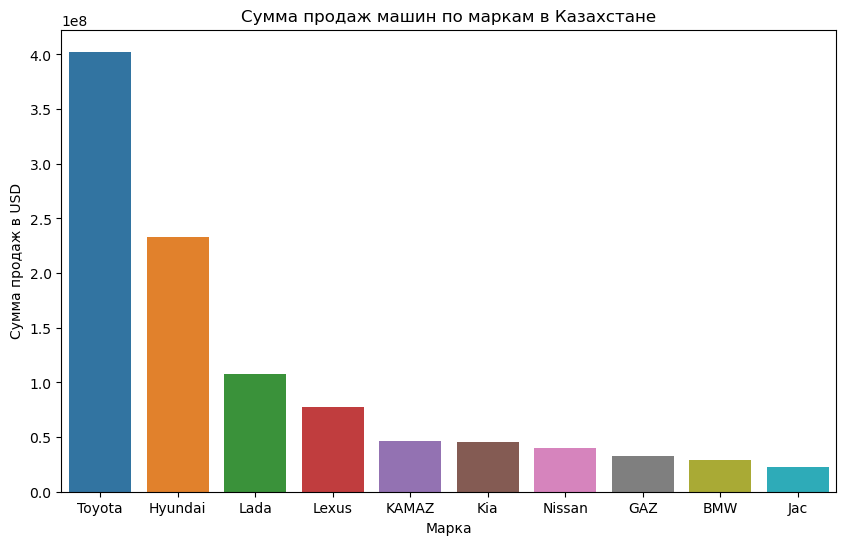

In [329]:
top_revenue_sold = revenue_sold.head(10)
plt.figure(figsize = (10,6))
sns.barplot(x= top_revenue_sold.Brand,y= top_revenue_sold.Sale_USD)
plt.title('Сумма продаж машин по маркам в Казахстане')
plt.ylabel('Сумма продаж в USD')
plt.xlabel('Марка')
plt.show()

Больше всего выручки преодолев рубеж в 100.000.000 USD принесли проданные машины марок Toyota (402500045 USD), Hyundai (233057868 USD) и Lada (107847478 USD).


### Поиск топовых марок машин в количественном выражении

In [330]:
number_sold = data.groupby('Brand',as_index = False).agg({'Quantity':'sum'}).sort_values('Quantity',ascending = False)
number_sold.head(10)

,Brand,Quantity
17,Lada,11092
34,Toyota,10745
9,Hyundai,10248
16,Kia,2358
7,GAZ,1821
29,Ravon,1785
26,Nissan,1664
13,Jac,1538
35,UAZ,1361
19,Lexus,1206


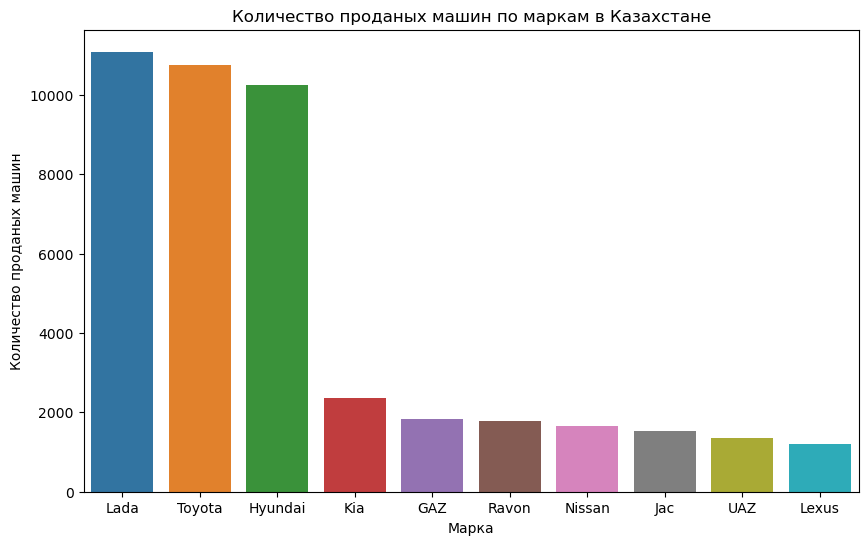

In [331]:
top_number_sold = number_sold.head(10)
plt.figure(figsize = (10,6))
sns.barplot(data = top_number_sold, x= 'Brand',y= 'Quantity')
plt.title('Количество проданых машин по маркам в Казахстане')
plt.ylabel('Количество проданых машин')
plt.xlabel('Марка')
plt.show()

В количестве проданых машин лидируют Lada (11092), Toyota (10745) и Hyundai (10248) их продано примерно одинаковое количество.
Судя по графикам средняя стоймость машин Lada сильно уступает маркам Hyundai и особенно Toyota

### Создаю общую таблицу суммы продажи и количества автомобилей

In [332]:
automobile = revenue_sold.merge(number_sold, how = 'inner', on = 'Brand')
automobile['price one car'] = round(automobile.Sale_USD/automobile.Quantity)
automobile

,Brand,Sale_USD,Quantity,price one car
0,Toyota,402500045.0,10745,37459.0
1,Hyundai,233057868.9,10248,22742.0
2,Lada,107847478.7,11092,9723.0
3,Lexus,77376364.3,1206,64160.0
4,KAMAZ,46092682.7,892,51673.0
5,Kia,45669700.0,2358,19368.0
6,Nissan,40012775.0,1664,24046.0
7,GAZ,32286192.3,1821,17730.0
8,BMW,28642248.3,437,65543.0
9,Jac,22454041.4,1538,14600.0


### Динамика продаж в целом по рынку: в денежном и натуральном выражении

In [333]:
sales_dynamics_revenue =  data.groupby('date',as_index = False).agg({'Sale_USD':'sum'})
sales_dynamics_revenue

,date,Sale_USD
0,2019-01-31,110565311.5
1,2019-02-28,106963707.6
2,2019-03-31,116407206.2
3,2019-04-30,142284878.2
4,2019-05-31,147185511.2
5,2019-06-30,148152322.7
6,2019-07-31,194144797.1
7,2019-08-31,144573390.6
8,2019-09-30,151159788.1


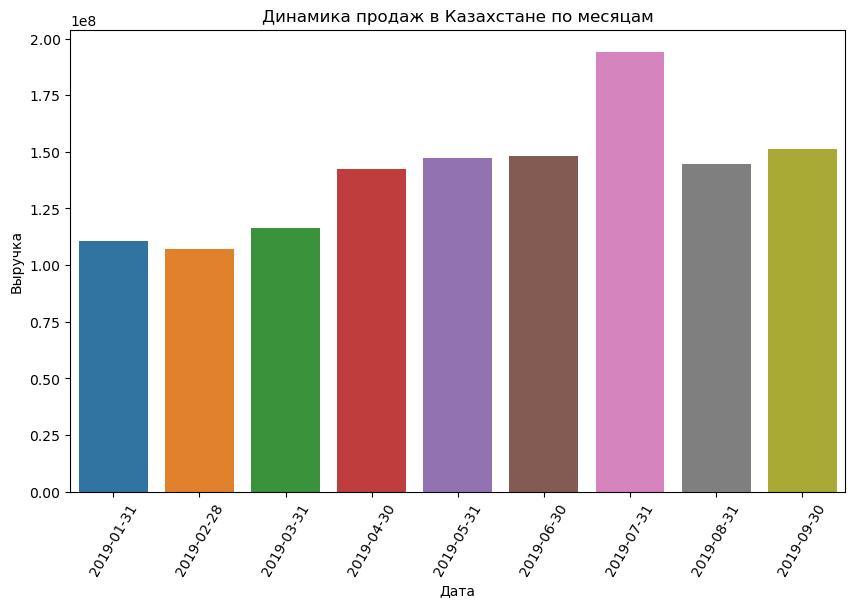

In [334]:
plt.figure(figsize = (10,6))
sns.barplot(data = sales_dynamics_revenue, x= 'date',y= 'Sale_USD')
plt.title('Динамика продаж в Казахстане по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.show()

Динамика продаж растёт на протяжении всего года и есть большой пик в июле

In [335]:
Sales_dynamics_by_quantity =  data.groupby('date',as_index = False).agg({'Quantity':'sum'})
Sales_dynamics_by_quantity

,date,Quantity
0,2019-01-31,4339
1,2019-02-28,4282
2,2019-03-31,4601
3,2019-04-30,5662
4,2019-05-31,5792
5,2019-06-30,5765
6,2019-07-31,7346
7,2019-08-31,6021
8,2019-09-30,6099


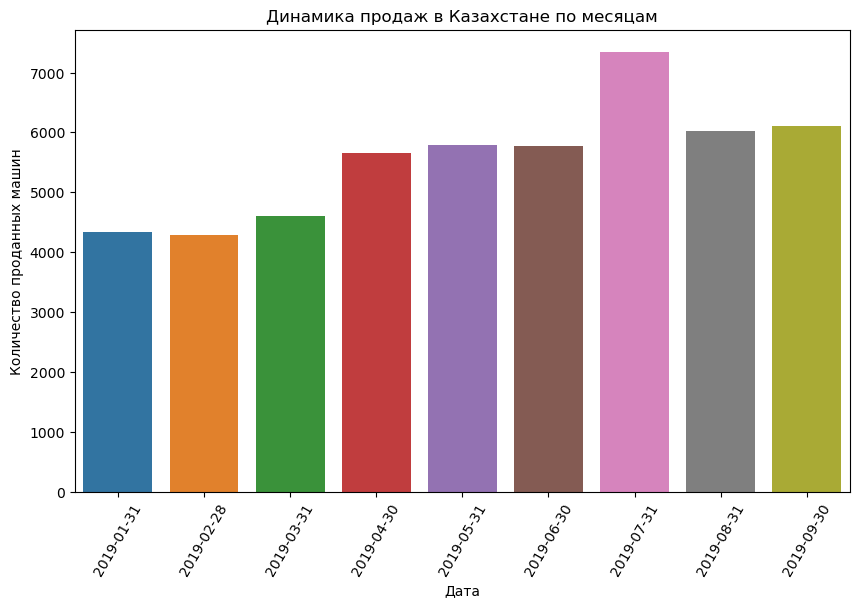

In [336]:
plt.figure(figsize = (10,6))
sns.barplot(data = Sales_dynamics_by_quantity, x= 'date',y= 'Quantity')
plt.title('Динамика продаж в Казахстане по месяцам')
plt.ylabel('Количество проданных машин')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.show()

Этот график схож с прошлым, видимо в июле была большая закупка для какого ни будь автопарка

In [337]:
July = data.query('Month == "Июль"').sort_values('Quantity',ascending = False).head(10)
July[['Brand','Quantity','Sale_USD']]

,Brand,Quantity,Sale_USD
25162,Skoda,100,1870000.0
39060,Daewoo,50,3778206.3
16651,Lada,47,423000.0
17363,Lada,41,463300.0
17049,Lada,40,284000.0
16645,Lada,33,297000.0
16636,Lada,32,288000.0
16652,Lada,29,261000.0
17909,Lada,28,324800.0
17917,Lada,27,313200.0


В этой таблице мы видим большую закупку машин Skoda и более дорогих Daewoo что и вызвало скачки на графиках

### Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

In [338]:
fuel_type = data.pivot_table(index = 'date',columns = 'Type_of_fuel',values = 'Quantity', aggfunc = sum)
fuel_type = fuel_type.drop('nan',axis = 1)
fuel_type

Type_of_fuel,Бензин,Гибрид,Дизель,Электро
date,,,,
2019-01-31,4128.0,NaN,121.0,NaN
2019-02-28,4065.0,1.0,135.0,1.0
2019-03-31,4435.0,2.0,156.0,NaN
2019-04-30,5457.0,NaN,187.0,2.0
2019-05-31,5556.0,NaN,199.0,NaN
2019-06-30,5543.0,NaN,190.0,1.0
2019-07-31,6802.0,1.0,520.0,10.0
2019-08-31,5776.0,4.0,235.0,NaN
2019-09-30,5555.0,2.0,302.0,NaN


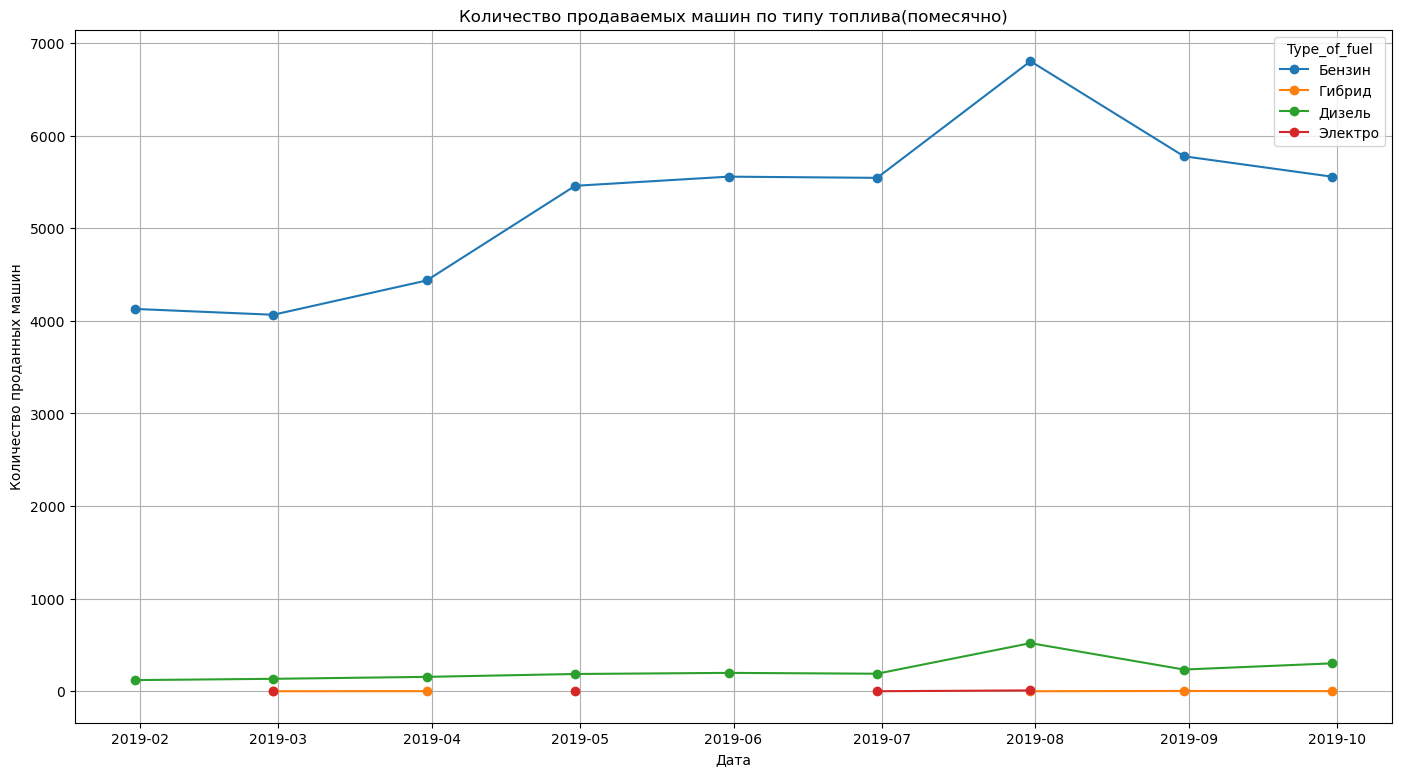

In [339]:
fuel_type.plot(grid = True,style = '-o', figsize = (17,9))
plt.title('Количество продаваемых машин по типу топлива(помесячно)')
plt.xlabel('Дата')
plt.ylabel('Количество проданных машин')
plt.show()

На графике видно что большинство продаваемых машин используют бензин, немногие дизель это судя по всему грузовики и фуры. Электро и гибрид встречается крайне редко.

In [340]:
data.Segmentation_2013.value_counts()

Внедорожники               16396
Легковые автомобили        15482
Коммерческие автомобили     3983
Пикапы                       973
Минивэны                     363
Name: Segmentation_2013, dtype: int64

In [341]:
segment = data.pivot_table(index = 'date',columns = 'Segmentation_2013',values = 'Quantity', aggfunc = sum)
segment

Segmentation_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
date,,,,,
2019-01-31,1747,317,2075,130,70
2019-02-28,1841,359,1814,154,114
2019-03-31,1605,443,2208,249,96
2019-04-30,2399,501,2379,260,123
2019-05-31,2267,606,2518,235,166
2019-06-30,2403,438,2541,238,145
2019-07-31,3197,792,3100,167,90
2019-08-31,2366,496,2823,231,105
2019-09-30,2313,590,3011,119,66


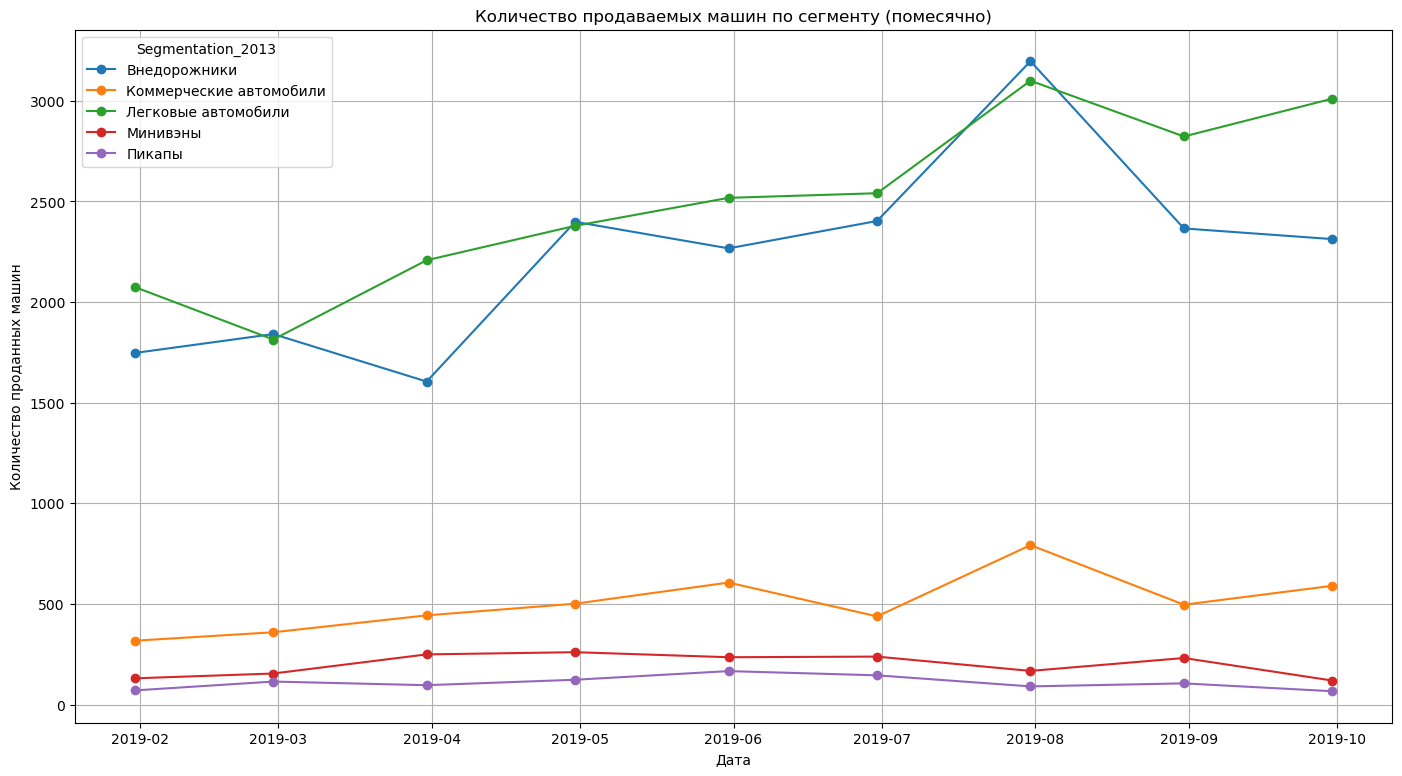

In [342]:
segment.plot(grid = True,style = '-o', figsize = (17,9))
plt.title('Количество продаваемых машин по сегменту (помесячно)')
plt.xlabel('Дата')
plt.ylabel('Количество проданных машин')
plt.show()

На графике видно что большинство покупают легковые автомобили(объём продаж показывает рост) или внедорожники, но под конец графика виден спад. В меньших объёмах закупаются коммерческие автомобили (рост в продажах не высок), а минивэны и пикапы почти не берут.

### Продажи по регионам

In [343]:
sale_regions = data.groupby('Region',as_index = False).agg({'Quantity':'sum','Sale_USD':'sum'})
sale_regions.sort_values('Quantity', ascending = False)

,Region,Quantity,Sale_USD
2,Алматы,12984,400074287.8
9,Нур-султан,9449,277064449.6
21,Шымкент,3573,79403794.2
3,Атырау,3192,67350094.6
7,Костанай,2924,81830840.9
4,Караганда,2531,51196644.1
0,Актау,2006,46071606.3
19,Уральск,1989,42973948.4
20,Усть-каменогорск,1988,37911957.2
1,Актобе,1747,42978350.3


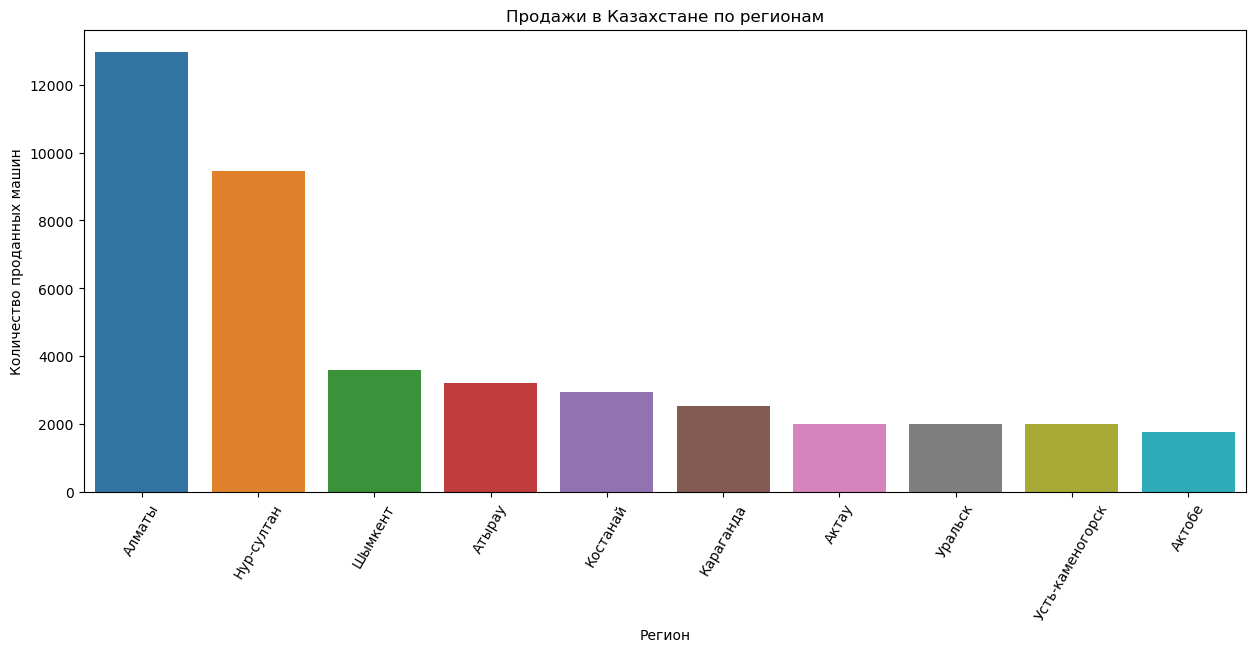

In [344]:
plt.figure(figsize = (15,6))
sns.barplot(data = sale_regions.sort_values('Quantity', ascending = False).head(10), x= 'Region',y= 'Quantity')
plt.title('Продажи в Казахстане по регионам')
plt.ylabel('Количество проданных машин')
plt.xlabel('Регион')
plt.xticks(rotation = 60)
plt.show()

In [345]:
print('Доля Алматы из всех проданных машин ',sale_regions.query('Region == "Алматы"').Quantity.sum()/sale_regions.Quantity.sum())
print('Доля Нур-султан из всех проданных машин ',sale_regions.query('Region == "Нур-султан"').Quantity.sum()/sale_regions.Quantity.sum())

Доля Алматы из всех проданных машин  0.26016390486304525
Доля Нур-султан из всех проданных машин  0.18933215781353316


Большинство машин продаются в г.Алматы и г.Нур-султан, в остальных регионах продажи на порядок ниже.

### Продажи по автоцентрам

In [346]:
dealer_center = data.groupby('Company',as_index = False).agg({'Quantity':'sum','Sale_USD':'sum'})
dealer_center.sort_values('Quantity',ascending = False)

,Company,Quantity,Sale_USD
24,БИПЭК АВТО,15131,185982178.7
18,Toyota Motor Kazakhstan,11951,479876409.3
2,Astana Motors,10169,229338625.5
25,Вираж,2909,46124747.3
0,Allur Auto,1963,49789204.5
12,Nissan Manufacturing RUS,1760,46289498.3
29,Равон Моторс Казахстан,1507,14938086.5
31,ТК КАМАЗ,893,46215933.9
10,Mercur Auto,646,18895231.7
16,Subaru Kazakhstan,503,16158326.4


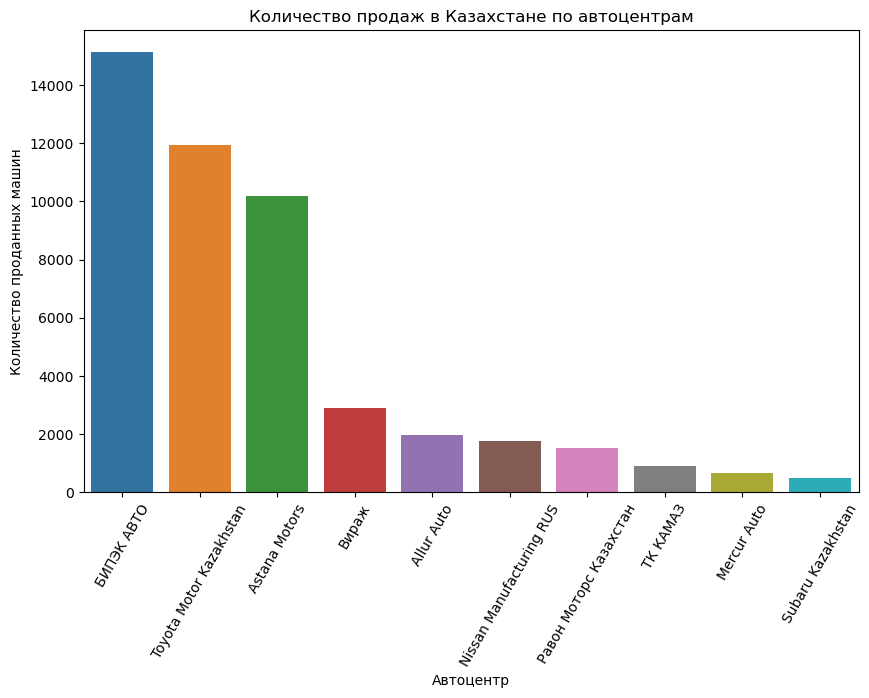

In [347]:
plt.figure(figsize = (10,6))
sns.barplot(data = dealer_center.sort_values('Quantity', ascending = False).head(10), x= 'Company',y= 'Quantity')
plt.title('Количество продаж в Казахстане по автоцентрам')
plt.ylabel('Количество проданных машин')
plt.xlabel('Автоцентр')
plt.xticks(rotation = 60)
plt.show()

Основные дилеры в Казахстане БИПЭК АВТО, Toyota Motor Kazakhstan и Astana Motors. Количество проданных машин каждого из этих центров сопоставимо с количеством всех других вместе взятых центров

### Самые популярные модели у брендов

In [348]:
machine_sales = data.groupby(['Brand','Model'],as_index = False).agg({'Quantity':'sum'}).sort_values(['Brand','Quantity'])
machine_sales.sort_values('Quantity',ascending = False).head(10)

,Brand,Model,Quantity
213,Toyota,Camry,4853
128,Lada,Granta,3664
65,Hyundai,Tucson,3271
131,Lada,Vesta,2653
133,Lada,unknown,2469
52,Hyundai,Accent,2211
55,Hyundai,Elantra,2062
54,Hyundai,Creta,1775
217,Toyota,LC Prado,1711
196,Ravon,Nexia R3,1690


In [353]:
machine_sales = data.groupby(['Brand','Model'],as_index = False).agg({'Quantity':'sum'}).sort_values(['Brand','Quantity'])
machine_sales['max'] = machine_sales.groupby('Brand').Quantity.transform('max')
machine_sales_max = machine_sales.loc[machine_sales['Quantity']==machine_sales['max']]
machine_sales_max = machine_sales_max.drop(['max'],axis = 1)
machine_sales_max.sort_values('Quantity',ascending = False).head(10)

,Brand,Model,Quantity
213,Toyota,Camry,4853
128,Lada,Granta,3664
65,Hyundai,Tucson,3271
196,Ravon,Nexia R3,1690
46,GAZ,3302,998
123,Kia,Rio,993
82,Jac,S3,969
187,Nissan,Qashqai,601
31,Chevrolet,Niva,567
236,Volkswagen,Polo,517


Тут я посмотрел какие самые продоваемые модели брендов Toyota - Camry(4853), Lada - Granta(3664), Hyundai - Tucson(3271)

In [357]:
machine_sales = machine_sales.drop(['max'],axis = 1)
machine_sales.query('Brand == "Lada"').sort_values('Quantity',ascending = False)

,Brand,Model,Quantity
128,Lada,Granta,3664
131,Lada,Vesta,2653
133,Lada,unknown,2469
130,Lada,Largus,1683
132,Lada,XRAY,602
134,Lada,ВИС,18
129,Lada,Kalina,3


Большинство моделей бренда Lada активно покупают.

In [359]:
machine_sales.query('Brand == "Toyota"').sort_values('Quantity',ascending = False)

,Brand,Model,Quantity
213,Toyota,Camry,4853
217,Toyota,LC Prado,1711
219,Toyota,RAV4,1213
214,Toyota,Corolla,1089
216,Toyota,HILUX DC,827
218,Toyota,LC200,779
215,Toyota,HIGHLANDER,197
212,Toyota,C-HR,76


У бренда Toyota в основном покупают модель Camry, но я бы не сказал что другие модели совсем не пользуются спросом.

In [360]:
machine_sales.query('Brand == "Hyundai"').sort_values('Quantity',ascending = False)

,Brand,Model,Quantity
65,Hyundai,Tucson,3271
52,Hyundai,Accent,2211
55,Hyundai,Elantra,2062
54,Hyundai,Creta,1775
62,Hyundai,Santa Fe,639
63,Hyundai,Sonata,188
56,Hyundai,H350,29
64,Hyundai,TQ-1/H-1,22
59,Hyundai,HD 65,21
60,Hyundai,HD 78,15


## Итоги исследования

Проведя исследование рынка я обнаружил

Самые продаваемые бренды это Lada (11092), Toyota(10745), Hyundai(10248), Kia(2358), GAZ(1821)

Больше всего принесли выручки Toyota (402500045 USD), Hyundai (233057868 USD) Lada (107847478 USD), Lexus (77376364 USD) и KAMAZ(46092682 USD).

Исследовав динамику продаж я увидел их постепенный рост (и один скачок в июле. Была большая партия закупки машин).

Большинство машин работают на бензине

Покупаются обычно легковые автомобили(объём продаж показывает рост) или внедорожники, но под конец наблюдения виден спад. В меньших объёмах закупаются коммерческие автомобили (рост в продажах не высок), а минивэны и пикапы почти не берут.

Большинство машин продаются в г. Алматы и г. Нур-султан, в остальных регионах продажи в разы ниже.

Доля продаж в г. Алматы от всех проданных машин 0.26

Доля продаж в г. Нур-султан от всех проданных машин 0.19

Самые продаваемые модели брендов Toyota - Camry(4853), Lada - Granta(3664), Hyundai - Tucson(3271), Ravon - Nexia R3(1690), GAZ(998)

Самые продаваемые модели Toyota - Camry(4853), Lada - Granta(3664), Hyundai - Tucson(3271), Lada - Vesta(2653) и (Lada неизвестной модели)

В казахстане есть 3 основных автоцентра продающих авто БИПЭК АВТО (15131), Toyota Motor Kazakhstan (11951) и Astana Motors(10169) следующий после них идёт автоцентр Вираж с 2909 проданными машинами

Я бы рекомендовал начинающему автоцентру обратить внимание на машины фирмы Lada (так как не дорогие(в среднем за машину 9723 USD), их могут себе позволить больше людей и большинство моделей пользуются спросом)

Toyota у этого бренда в основном покупают модель Camry, но я бы не сказал что другие модели совсем не пользуются спросом и средняя цена за машину тут повыше 37459 USD.

Hyundai у этого бренда есть несколько популярных моделей и средняя цена за машину 22742 USD.

Открывать салоны я бы советовал в г. Алматы и г. Нур-султан. В них хоть и высока конкурентность, но и покупателей через них проходит больше